<a href="https://colab.research.google.com/github/Techvolutions05/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Anell_Santos_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [27]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# checking for the mean, var, std for sales

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

mean = sum(sales) / float(len(sales))
var = sum(pow(x-mean, 2) for x in sales) / len(sales)
std = math.sqrt(var)

print('The mean of sales is:', mean)
print('The variance of sales is:', var)
print('The standard deviation of sales is:', std)

print('\nUsing numpy to check for mean, var & std of sales:')

print('\nThe mean of sales is:', np.mean(sales))
print('The variance of sales is:', np.var(sales))
print('The standard deviation of sales is:', np.std(sales))


The mean of sales is: 3052.714285714286
The variance of sales is: 183761.06122448976
The standard deviation of sales is: 428.67360686714756

Using numpy to check for mean, var & std of sales:

The mean of sales is: 3052.714285714286
The variance of sales is: 183761.06122448976
The standard deviation of sales is: 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [29]:
# Finding the covariance of sales & customers using .cov() function

customers = [127, 80, 105, 92, 120, 115, 93]

covar = np.cov(sales, customers, ddof=0)[0][1]

print('The coraviance is:', covar)

The coraviance is: 6518.020408163265


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [30]:
# Defining mean_var_std 

def mean_var_std(list):
  mean = sum(list)/len(list)
  variance = sum([(mean-i)**2 for i in list])/len(list)
  std = (sum([(mean - i)**2 for i in list])/len(list))**0.5
  
  return mean, variance, std

cust_mean, cust_var, cust_std = mean_var_std(customers)
sales_mean, sales_var, sales_std = mean_var_std(sales)

In [34]:
# Defining The coefficient

'''
1 def cor_coef_r(x,y):
2   mean_x, variance_x, std_x = mean_var_std(x)
3   mean_y, variance_y, std_y = mean_var_std(y)
4   r = covar(x,y)/(std_x * std_y)
5   return r

Tried to define the correlation coefficient with this function above but it
was giving me an error "numpy.float64 not collable" on the 4th line.
'''


print('The standar deviation of customers is:', cust_std)
print('\nThe correlation coeffient is:', np.corrcoef(sales,customers)[0][1])

The standar deviation of customers is: 15.792015549069118

The correlation coeffient is: 0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [35]:
# Loading the datset
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [37]:
# Extracting the numeric columns

numeric_col = df[['pclass', 'survived', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'boat', 'body' , 'has_cabin_number']]

numeric_col.head()

,pclass,survived,age,sibsp,parch,ticket,fare,boat,body,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,24160,211.3375,2,NaN,1
1,1.0,1.0,0.9167,1.0,2.0,113781,151.5500,11,NaN,1
2,1.0,0.0,2.0000,1.0,2.0,113781,151.5500,NaN,NaN,1
3,1.0,0.0,30.0000,1.0,2.0,113781,151.5500,NaN,135.0,1
4,1.0,0.0,25.0000,1.0,2.0,113781,151.5500,NaN,NaN,1


In [38]:
# fiding the covariance of each column

numeric_col.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [39]:
# finding the correlation on each column

numeric_col.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

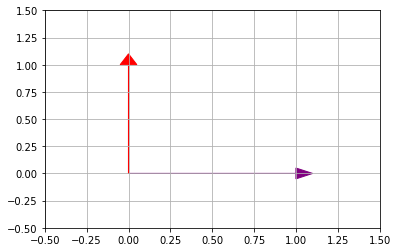

A synonym for orthogonal is perpendicular


In [40]:
x = [1,0]
y = [0,1]

plt.arrow(0,0, x[0],x[1], head_width = 0.1, head_length = 0.1, color = 'purple')
plt.arrow(0,0, y[0],y[1], head_width = 0.1, head_length = 0.1, color = 'red')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()

print('A synonym for orthogonal is perpendicular')

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [47]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

print(np.dot(a,b))

print('\nIn oder for vectors to be orthogonal their dot\nproduct must be = 0. therefore they are not orthogonal.')

-40

In oder for vectors to be orthogonal their dot
product must be = 0. therefore they are not orthogonal.


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [49]:
c = np.array([2, -15, 6, 20])

c_norm_sqrt = (np.linalg.norm(c))**2
c_c = np.dot(c,c)
c_tran = (c.T)*c

print('The norm sqrt is:', c_norm_sqrt)
print('The dot product is:', c_c)
print('The Transpose is:', c_tran)
print('\nWhat these qualities have in common is that the norm squared\nis equal to the dot product.')

The norm sqrt is: 665.0
The dot product is: 665
The Transpose is: [  4 225  36 400]

What these qualities have in common is that the norm squared
is equal to the dot product.


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align} d= 7\hat{i} + 12\hat{j} \end{align}


\begin{align} e= 2\hat{i} + 11\hat{j} + -8\hat{k} \end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [51]:
f = [4, 1, 2, 11, 9, 2]

norm = np.linalg.norm(f)
unit_vec = np.multiply(f,1/norm)
print(unit_vec)

[0.26548932 0.06637233 0.13274466 0.73009564 0.59735098 0.13274466]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

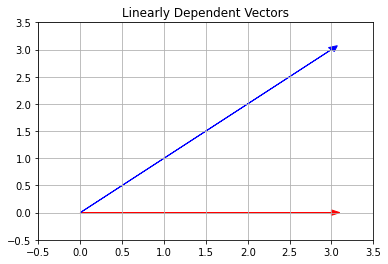

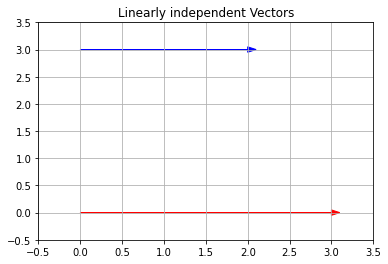

In [66]:
a = [3,0]
b = [3,3]

plt.figure()
plt.grid()
plt.arrow(0,0, a[0],a[1], head_width = 0.1, head_length = 0.1, color = 'red')
plt.arrow(0,0, b[0],b[1], head_width = 0.1, head_length = 0.1, color = 'blue')
plt.xlim(-0.5, 3.5)
plt.ylim(-0.5, 3.5)
plt.title('Linearly Dependent Vectors')

c = [3,0]
d = [2,0]

plt.figure()
plt.grid()
plt.arrow(0,0, c[0],c[1], head_width = 0.1, head_length = 0.1, color = 'red')
plt.arrow(0,3, d[0],d[1], head_width = 0.1, head_length = 0.1, color = 'blue')
plt.xlim(-0.5, 3.5)
plt.ylim(-0.5, 3.5)
plt.title('Linearly independent Vectors')
plt.show()


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [56]:
g = [1, 2]
h = [4, 8] 
matrix = np.matrix([g,h])
#print(gh_matrix)

print(np.linalg.matrix_rank(matrix))
print('\nThe span is 1D')

1

The span is 1D


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [59]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]

matrix = np.matrix([l,m,n])
print(np.linalg.matrix_rank(matrix))
print('\nThe spans are 3D')

3

The spans are 3D


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



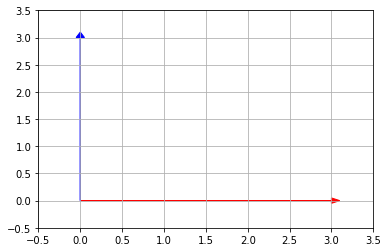

In [65]:
x = [3,0]
y = [0,3]


plt.figure()
plt.grid()
plt.arrow(0,0, x[0],x[1], head_width = 0.1, head_length = 0.1, color = 'red')
plt.arrow(0,0, y[0],y[1], head_width = 0.1, head_length = 0.1, color = 'blue')
plt.xlim(-0.5, 3.5)
plt.ylim(-0.5, 3.5)
plt.show()

## 6.2 What does it mean to form a basis?

It means that the span of the vectors space form a V shape and are linearly independent.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [68]:
p = np.matrix([[1,2,3], [-1,0,7], [4,8,2]])
          
print('The rank of P is:', np.linalg.matrix_rank(p))             

The rank of P is: 3


## 7.2 What does the rank of a matrix tell us?

The span space of a vector.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

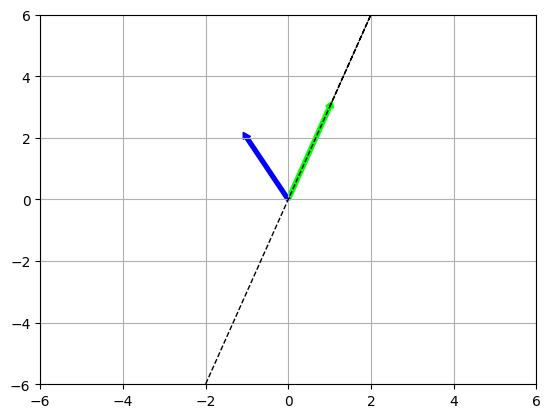

In [74]:
# Original Vectors
x = [1, 3]
y = [-1, 2]

# Scaled Vectors
v = np.multiply(x, 2)
v_neg_2 = np.negative(v)


x_vals = [x[0],v[0],v_neg_2[0]]
y_vals = [x[1],v[1],v_neg_2[1]]
plt.arrow(0,0, x[0],x[1], head_width = 0.2, head_length = 0.2, width = 0.1, color = 'lime')
plt.plot(x_vals, y_vals, '--', linewidth=1, color='black')
plt.arrow(0,0, y[0],y[1], head_width = 0.2, head_length = 0.2, width = 0.1, color = 'blue')


# axis
plt.xlim(-6, 6)
plt.ylim(-6, 6)



plt.grid()
plt.show()

In [77]:
print(v_neg_2)

[-2 -6]


# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

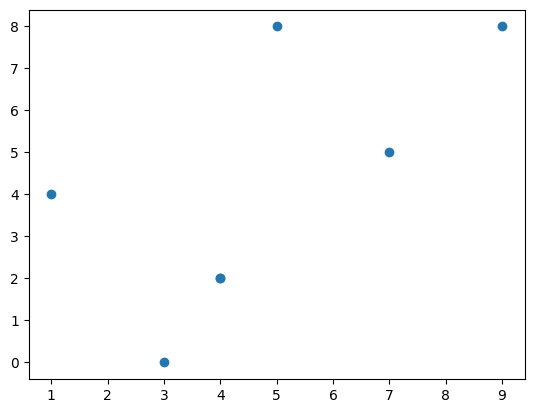

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()